In [1]:
import pandas as pd

In [2]:
# Process and clean the raw data. Save the cleaned data to a different file.
input_file = 'data/raw/Motor_Vehicle_Collisions___Crashes_20250123.csv'
output_file = 'data/clean/mvc_crashes.csv'
try:
    # Read the CSV file
    df = pd.read_csv(input_file)

    # Select specific columns
    selected_columns = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LOCATION']
    df_cols = df[selected_columns]

    # Drop rows with NaN in any column
    df_cleaned = df_cols.dropna()

    # Reset the index after filtering
    df_cleaned = df_cleaned.reset_index(drop=True)

    # Display the first few rows
    print(df_cleaned.head())

    # Save the cleaned data to a new CSV file
    df_cleaned.to_csv(output_file, index=False)
    print(f"Cleaned data saved to {output_file}")

except FileNotFoundError:
    print(f"Error: File not found at {input_file}")
except KeyError as e:
    print(f"Error: Missing expected column in the dataset: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

/var/folders/qf/thggxffx643_rhwr9s1hfhpw0000gq/T/ipykernel_32905/3747212285.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


   CRASH DATE CRASH TIME    BOROUGH                 LOCATION
0  09/11/2021       9:35   BROOKLYN    (40.667202, -73.8665)
1  12/14/2021       8:13   BROOKLYN  (40.683304, -73.917274)
2  12/14/2021       8:17      BRONX    (40.86816, -73.83148)
3  12/14/2021      21:10   BROOKLYN     (40.67172, -73.8971)
4  12/14/2021      14:58  MANHATTAN    (40.75144, -73.97397)
Cleaned data saved to data/clean/mvc_crashes.csv


In [3]:
data = "data/clean/mvc_crashes.csv"
# Read the CSV file
df = pd.read_csv(data)

# Display the first few rows
print(df.head())
# prints: CRASH DATE, CRASH TIME, BOROUGH, LOCATION

   CRASH DATE CRASH TIME    BOROUGH                 LOCATION
0  09/11/2021       9:35   BROOKLYN    (40.667202, -73.8665)
1  12/14/2021       8:13   BROOKLYN  (40.683304, -73.917274)
2  12/14/2021       8:17      BRONX    (40.86816, -73.83148)
3  12/14/2021      21:10   BROOKLYN     (40.67172, -73.8971)
4  12/14/2021      14:58  MANHATTAN    (40.75144, -73.97397)


In [4]:
# Convert 'CRASH DATE' to datetime
#df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')

# Convert 'CRASH TIME' to datetime (combine date and time into a single datetime column)
#df['CRASH TIME'] = pd.to_datetime(df['CRASH DATE'].astype(str) + ' ' + df['CRASH TIME'], format='%Y-%m-%d %H:%M')

# Check the DataFrame after conversion
#print(df.head())

In [5]:
# Extract latitude and longitude
df[['LATITUDE', 'LONGITUDE']] = df['LOCATION'].str.extract(r'\((.*),\s*(.*)\)')

# Convert latitude and longitude to numeric values
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'])
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'])

# Check the DataFrame
print(df.head())


   CRASH DATE CRASH TIME    BOROUGH                 LOCATION   LATITUDE  \
0  09/11/2021       9:35   BROOKLYN    (40.667202, -73.8665)  40.667202   
1  12/14/2021       8:13   BROOKLYN  (40.683304, -73.917274)  40.683304   
2  12/14/2021       8:17      BRONX    (40.86816, -73.83148)  40.868160   
3  12/14/2021      21:10   BROOKLYN     (40.67172, -73.8971)  40.671720   
4  12/14/2021      14:58  MANHATTAN    (40.75144, -73.97397)  40.751440   

   LONGITUDE  
0 -73.866500  
1 -73.917274  
2 -73.831480  
3 -73.897100  
4 -73.973970  


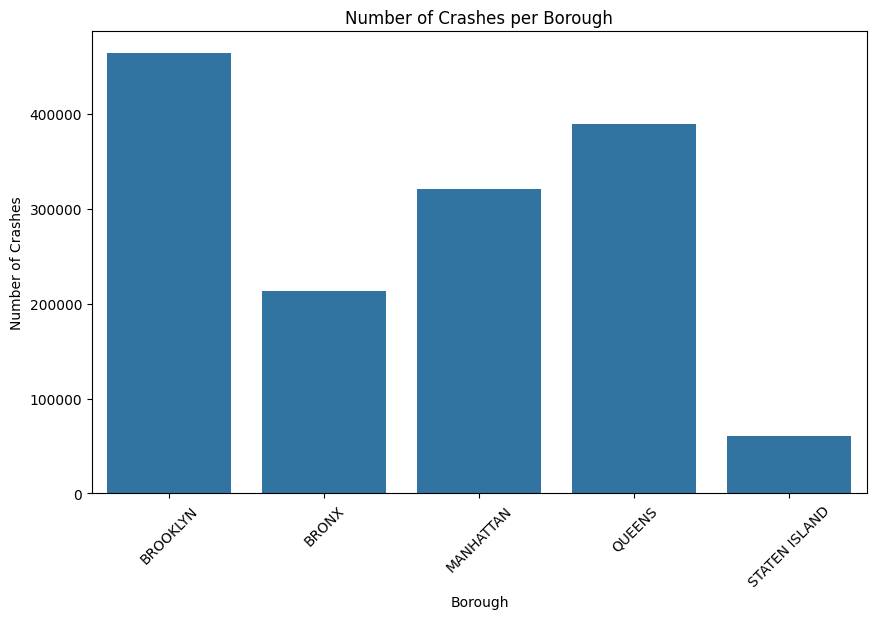

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt

# Plot the number of crashes per borough
plt.figure(figsize=(10, 6))
sb.countplot(x='BOROUGH', data=df)
plt.title('Number of Crashes per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

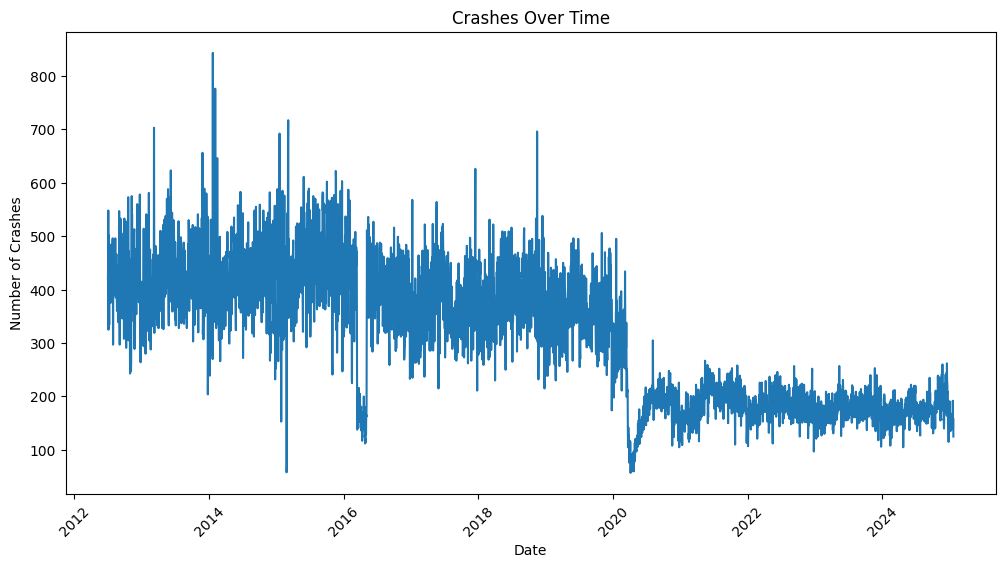

In [7]:
# Count the number of crashes per day
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df_daily = df.groupby(df['CRASH DATE']).size().reset_index(name='CRASH COUNT')

# Plot crashes over time
plt.figure(figsize=(12, 6))
sb.lineplot(x='CRASH DATE', y='CRASH COUNT', data=df_daily)
plt.title('Crashes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()


In [8]:
print(df.head())


  CRASH DATE CRASH TIME    BOROUGH                 LOCATION   LATITUDE  \
0 2021-09-11       9:35   BROOKLYN    (40.667202, -73.8665)  40.667202   
1 2021-12-14       8:13   BROOKLYN  (40.683304, -73.917274)  40.683304   
2 2021-12-14       8:17      BRONX    (40.86816, -73.83148)  40.868160   
3 2021-12-14      21:10   BROOKLYN     (40.67172, -73.8971)  40.671720   
4 2021-12-14      14:58  MANHATTAN    (40.75144, -73.97397)  40.751440   

   LONGITUDE  
0 -73.866500  
1 -73.917274  
2 -73.831480  
3 -73.897100  
4 -73.973970  


In [9]:
# Get the first and last date
first_day = df['CRASH DATE'].min()
last_day = df['CRASH DATE'].max()

# Print the results
print(f"First Day: {first_day}")
print(f"Last Day: {last_day}")


First Day: 2012-07-01 00:00:00
Last Day: 2025-01-20 00:00:00


In [10]:
# Format the dates
first_day_formatted = first_day.strftime('%m/%d/%Y')
last_day_formatted = last_day.strftime('%m/%d/%Y')

print(f"First Day: {first_day_formatted}")
print(f"Last Day: {last_day_formatted}")


First Day: 07/01/2012
Last Day: 01/20/2025


<Axes: xlabel='BOROUGH', ylabel='count'>

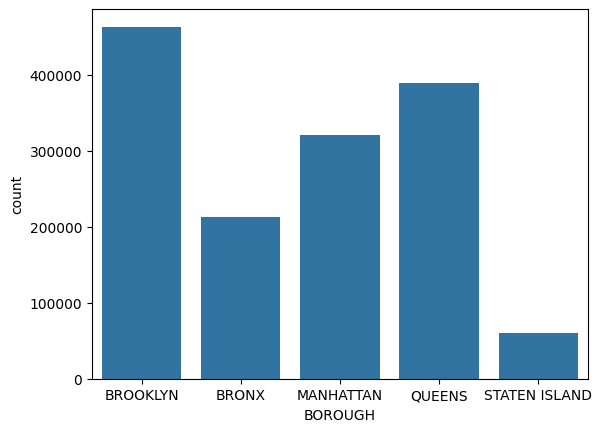

In [11]:
sb.countplot(data=df,x='BOROUGH')

In [12]:
# Get the total number of crashes (total rows in the DataFrame)
total_crashes = len(df)

print(f"Total number of crashes: {total_crashes}")


Total number of crashes: 1447042


<Axes: xlabel='BOROUGH', ylabel='Count'>

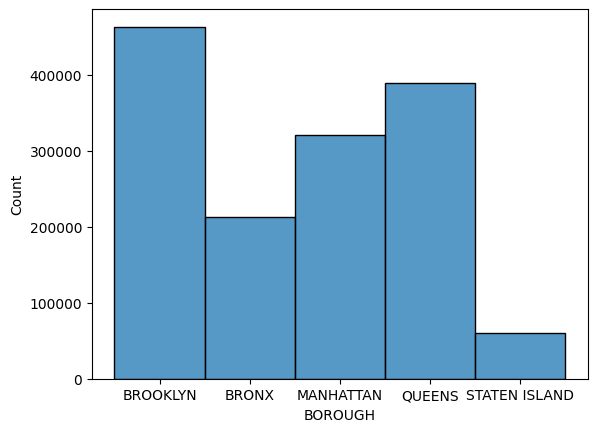

In [13]:
sb.histplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH'>

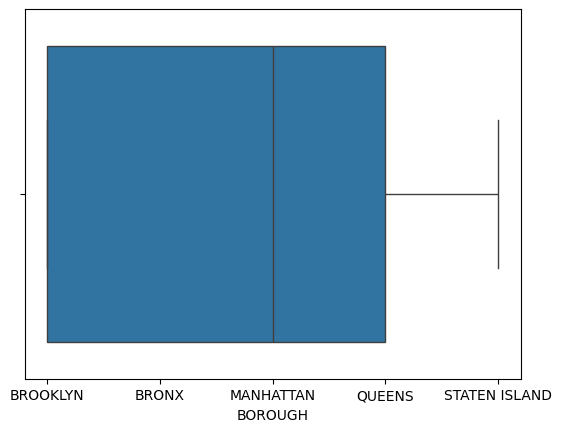

In [14]:
sb.boxplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH'>

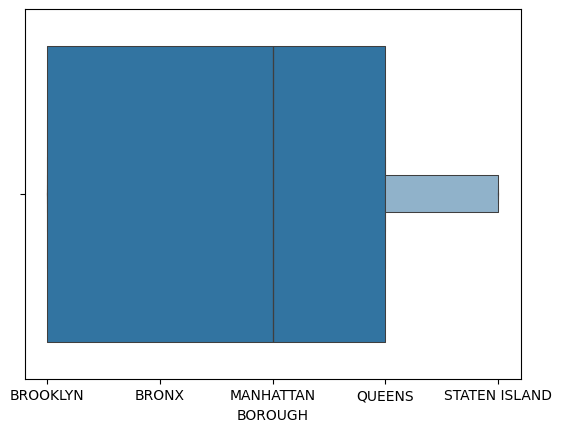

In [15]:
sb.boxenplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH'>

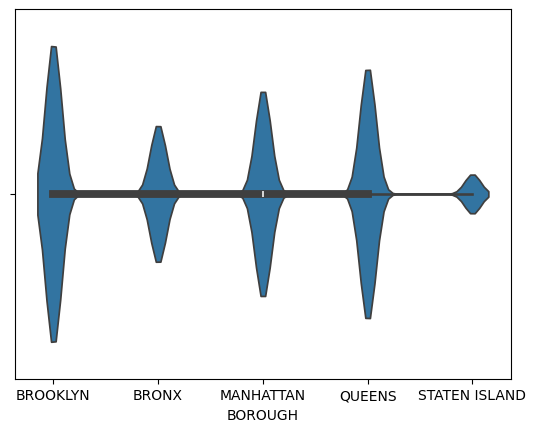

In [16]:
sb.violinplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH'>

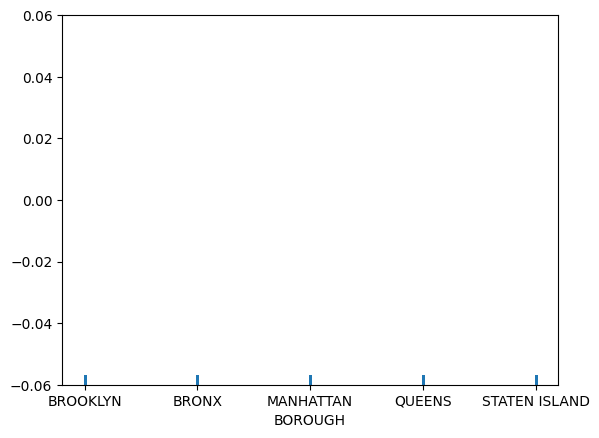

In [17]:
sb.rugplot(data=df,x='BOROUGH')

<Axes: xlabel='CRASH DATE', ylabel='Density'>

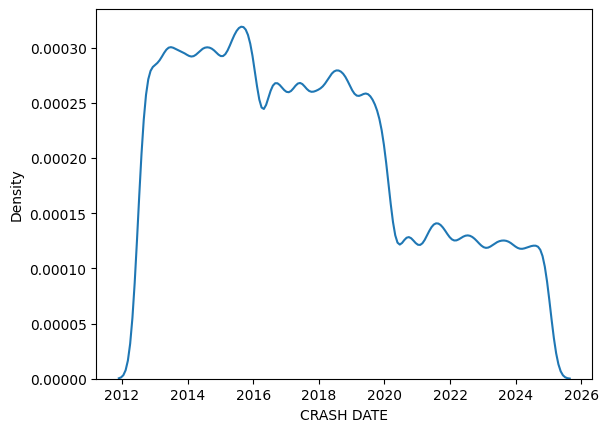

In [18]:
sb.kdeplot(data=df,x='CRASH DATE')

<Axes: xlabel='BOROUGH'>

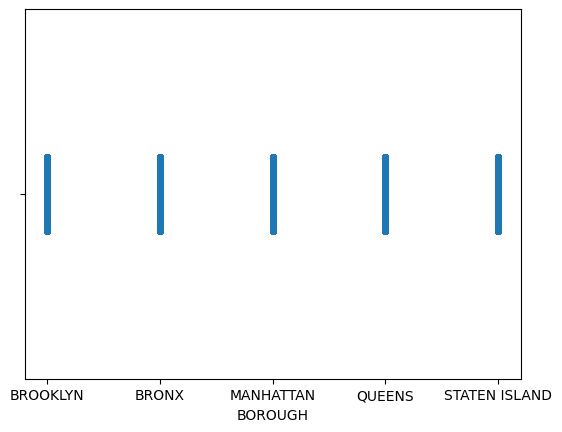

In [19]:
sb.stripplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH', ylabel='Proportion'>

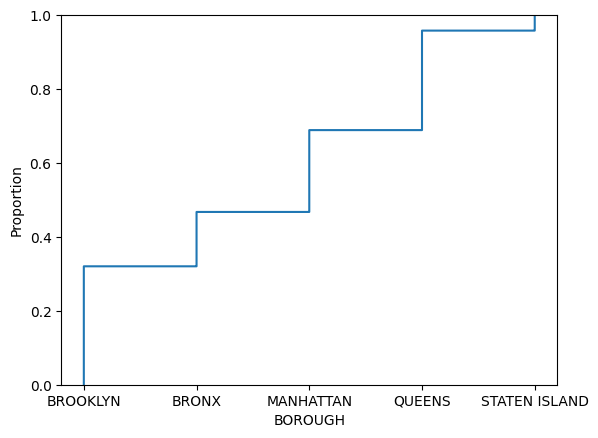

In [20]:
sb.ecdfplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH', ylabel='CRASH TIME'>

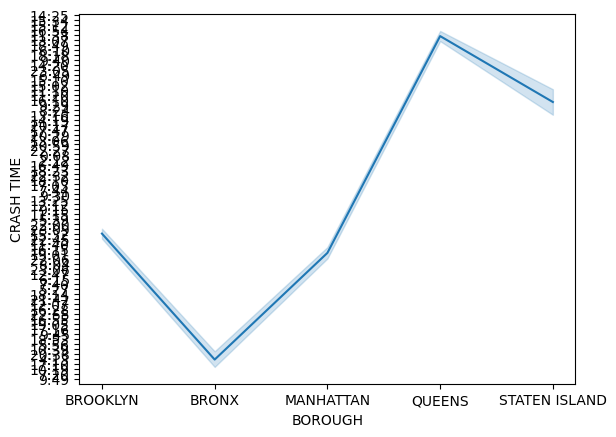

In [21]:
sb.lineplot(data=df,x='BOROUGH',y='CRASH TIME')

In [22]:

# Convert 'CRASH DATE' to datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')

# Convert 'CRASH TIME' to datetime and combine with 'CRASH DATE' for full datetime
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE'].astype(str) + ' ' + df['CRASH TIME'], format='%Y-%m-%d %H:%M')

# Group by Year
df['YEAR'] = df['CRASH DATE'].dt.year
crash_count_by_year = df.groupby('YEAR').size().reset_index(name='CRASH COUNT')
crash_count_by_year.to_csv('data/clean/crash_count_by_year.csv', index=False)

# Group by Month
df['MONTH'] = df['CRASH DATE'].dt.month
crash_count_by_month = df.groupby('MONTH').size().reset_index(name='CRASH COUNT')
crash_count_by_month.to_csv('data/clean/crash_count_by_month.csv', index=False)

# Group by Hour
df['HOUR'] = df['CRASH DATETIME'].dt.hour
crash_count_by_hour = df.groupby('HOUR').size().reset_index(name='CRASH COUNT')
crash_count_by_hour.to_csv('data/clean/crash_count_by_hour.csv', index=False)


In [23]:
print(df.head())

  CRASH DATE CRASH TIME    BOROUGH                 LOCATION   LATITUDE  \
0 2021-09-11       9:35   BROOKLYN    (40.667202, -73.8665)  40.667202   
1 2021-12-14       8:13   BROOKLYN  (40.683304, -73.917274)  40.683304   
2 2021-12-14       8:17      BRONX    (40.86816, -73.83148)  40.868160   
3 2021-12-14      21:10   BROOKLYN     (40.67172, -73.8971)  40.671720   
4 2021-12-14      14:58  MANHATTAN    (40.75144, -73.97397)  40.751440   

   LONGITUDE      CRASH DATETIME  YEAR  MONTH  HOUR  
0 -73.866500 2021-09-11 09:35:00  2021      9     9  
1 -73.917274 2021-12-14 08:13:00  2021     12     8  
2 -73.831480 2021-12-14 08:17:00  2021     12     8  
3 -73.897100 2021-12-14 21:10:00  2021     12    21  
4 -73.973970 2021-12-14 14:58:00  2021     12    14  


In [24]:
print(crash_count_by_hour)

    HOUR  CRASH COUNT
0      0        45057
1      1        24270
2      2        18870
3      3        16596
4      4        18384
5      5        19343
6      6        29251
7      7        41553
8      8        79618
9      9        77044
10    10        73036
11    11        76552
12    12        81682
13    13        85488
14    14        98065
15    15        90323
16    16       103913
17    17       101507
18    18        90097
19    19        74635
20    20        62787
21    21        52999
22    22        47518
23    23        38454


In [25]:
print(crash_count_by_month)

    MONTH  CRASH COUNT
0       1       116396
1       2       103537
2       3       111672
3       4        98418
4       5       120755
5       6       122102
6       7       131406
7       8       127790
8       9       128156
9      10       131639
10     11       126927
11     12       128244


In [26]:
print(crash_count_by_year)

    YEAR  CRASH COUNT
0   2012        77575
1   2013       155981
2   2014       156351
3   2015       163453
4   2016       136902
5   2017       138519
6   2018       144807
7   2019       133092
8   2020        71634
9   2021        70092
10  2022        66649
11  2023        64531
12  2024        64390
13  2025         3066


<Axes: xlabel='YEAR', ylabel='CRASH COUNT'>

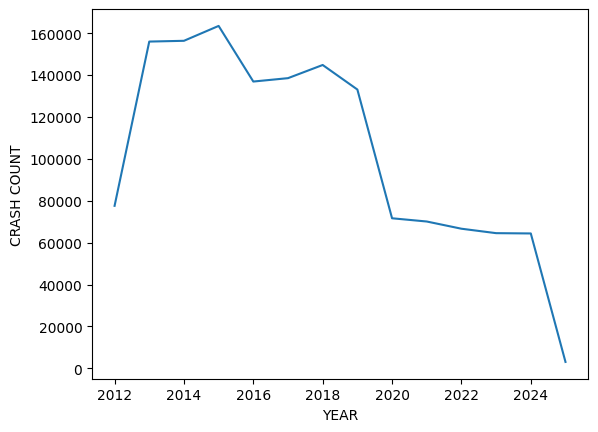

In [27]:
sb.lineplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT')

<Axes: xlabel='MONTH', ylabel='CRASH COUNT'>

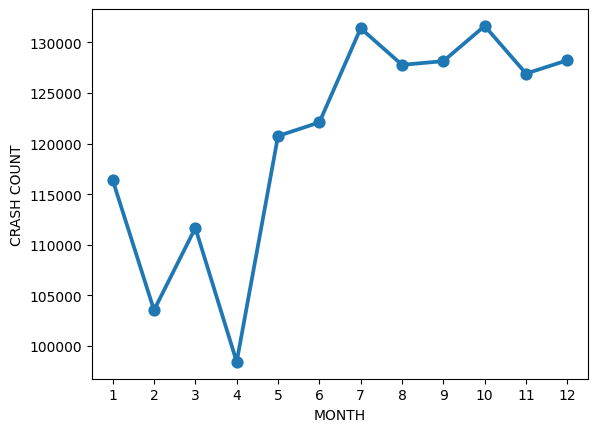

In [28]:
sb.pointplot(data=crash_count_by_month,x='MONTH',y='CRASH COUNT')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

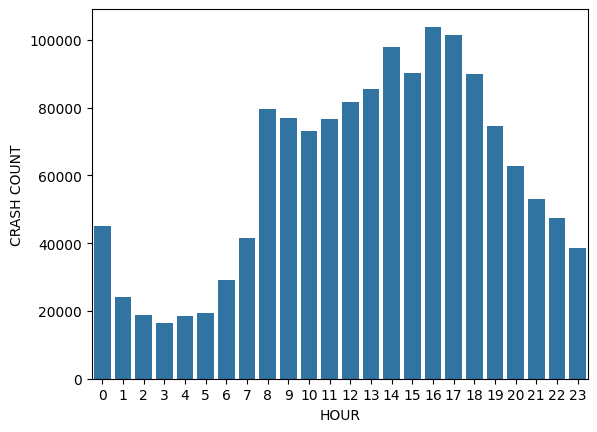

In [29]:
sb.barplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

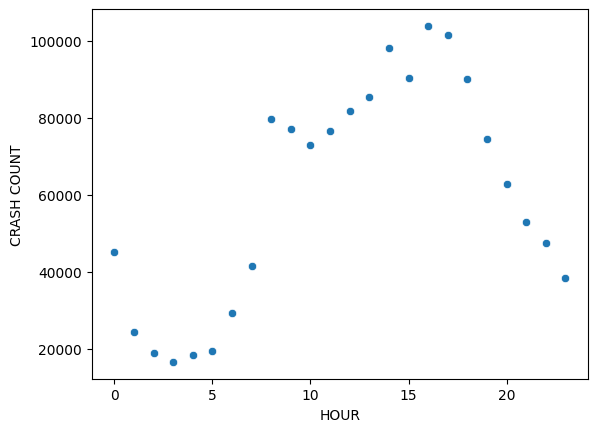

In [30]:
sb.scatterplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT')

<Axes: xlabel='YEAR', ylabel='CRASH COUNT'>

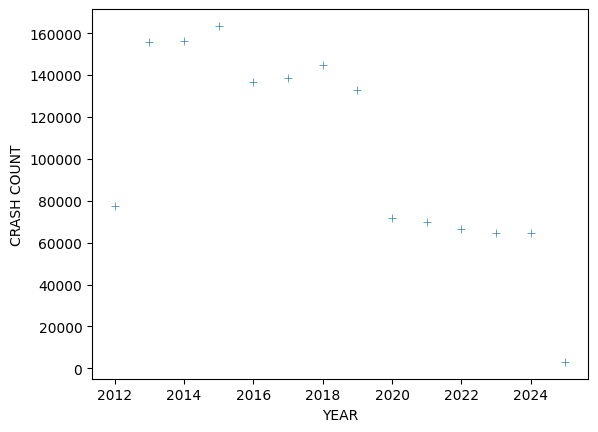

In [31]:
sb.scatterplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT', marker='+')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

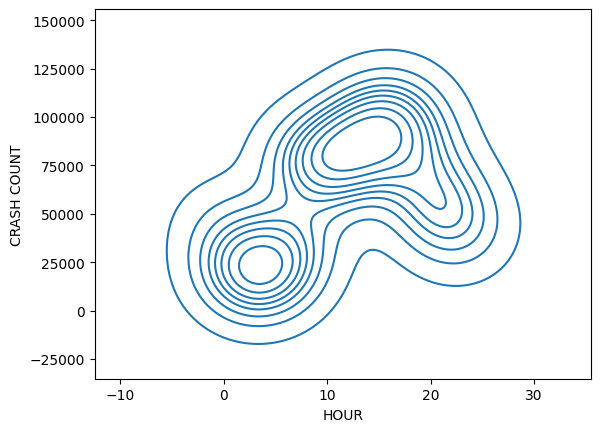

In [32]:
sb.kdeplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

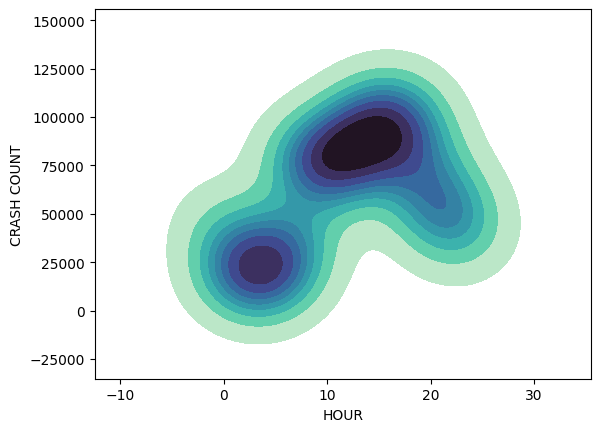

In [33]:
sb.kdeplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT',fill=True,cmap='mako_r')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

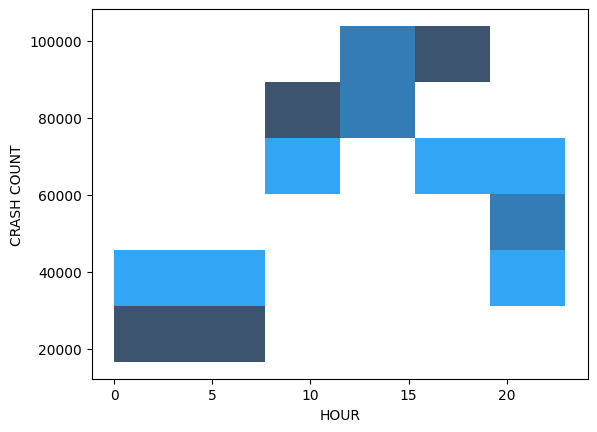

In [34]:
sb.histplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT')

<Axes: xlabel='YEAR', ylabel='CRASH COUNT'>

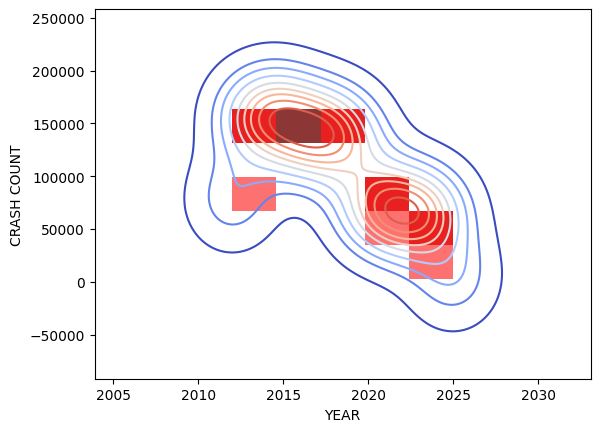

In [35]:
sb.kdeplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT',cmap='coolwarm')
sb.histplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT', color='red')

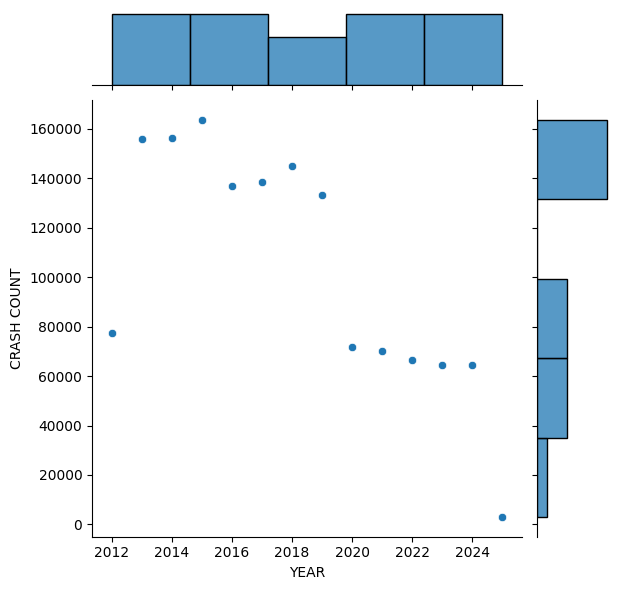

In [36]:
sb.jointplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT')

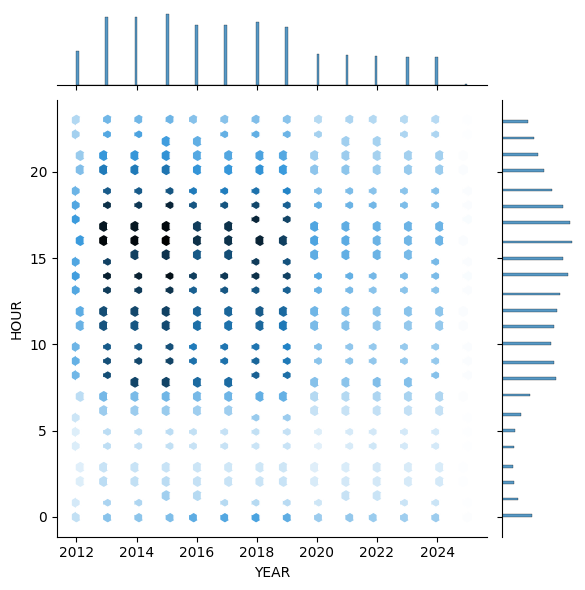

In [37]:
sb.jointplot(data=df,x='YEAR',y='HOUR',kind='hex')

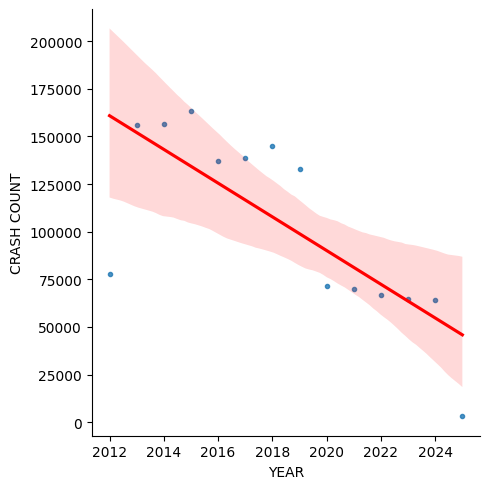

In [38]:
sb.lmplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT',markers=".",line_kws={'color': 'red'})

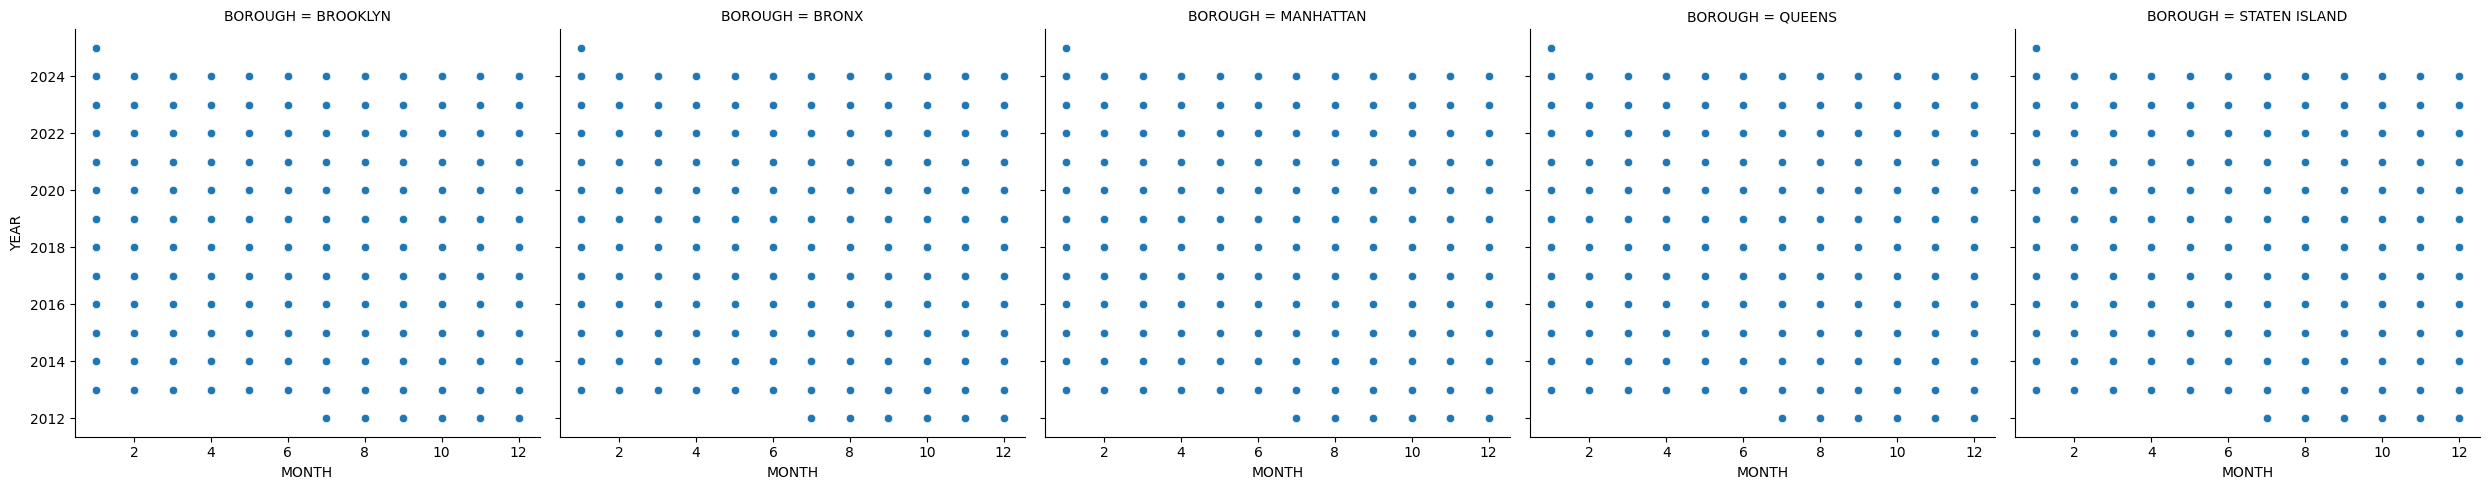

In [39]:
sb.relplot(data=df,x='MONTH',y='YEAR',col='BOROUGH')

<Axes: >

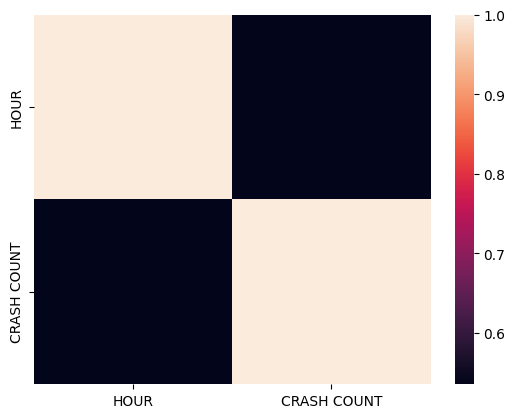

In [40]:
sb.heatmap(crash_count_by_hour.corr())

<Axes: >

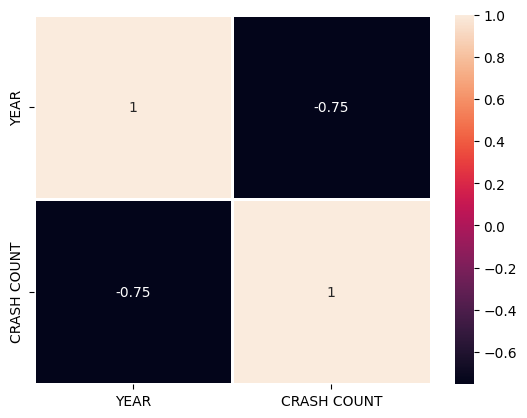

In [41]:
sb.heatmap(crash_count_by_year.corr(),annot=True,linewidths=1)

In [62]:
borough_data = df.groupby('BOROUGH').size().reset_index(name='CRASH COUNT')
print(borough_data.head())

         BOROUGH  CRASH COUNT
0          BRONX       212823
1       BROOKLYN       463616
2      MANHATTAN       320430
3         QUEENS       389551
4  STATEN ISLAND        60622


<Axes: title={'center': 'Crashes Over Time'}>

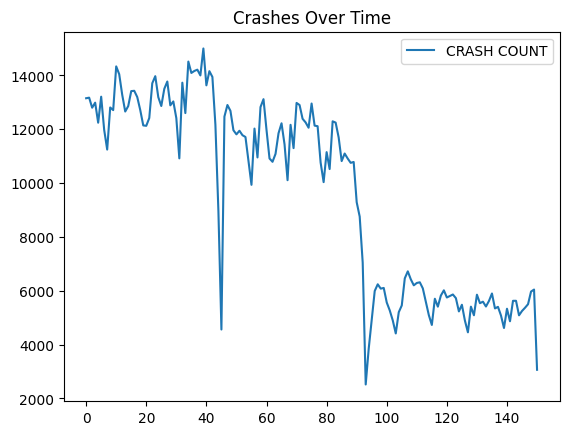

In [68]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
crashes_per_month = df.groupby(df['CRASH DATE'].dt.to_period('M')).size().reset_index(name='CRASH COUNT')
crashes_per_month.plot(kind='line', title='Crashes Over Time')

<Axes: title={'center': 'Crashes by Day of the Week'}>

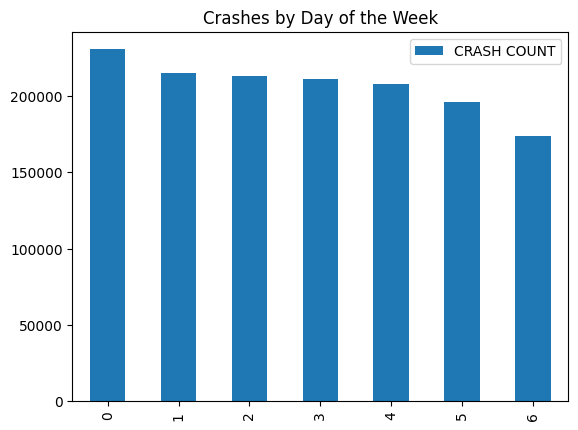

In [70]:
df['WEEKDAY'] = df['CRASH DATE'].dt.day_name()
crashes_per_day = df['WEEKDAY'].value_counts().reset_index(name='CRASH COUNT')
crashes_per_day.plot(kind='bar', title='Crashes by Day of the Week')

In [72]:
print(crashes_per_day)

     WEEKDAY  CRASH COUNT
0     Friday       230396
1   Thursday       215133
2    Tuesday       212954
3  Wednesday       211041
4     Monday       207699
5   Saturday       195841
6     Sunday       173978


In [69]:
print(crashes_per_month.head())

  CRASH DATE  CRASH COUNT
0    2012-07        13153
1    2012-08        13175
2    2012-09        12802
3    2012-10        12989
4    2012-11        12245


<Axes: xlabel='HOUR', ylabel='WEEKDAY'>

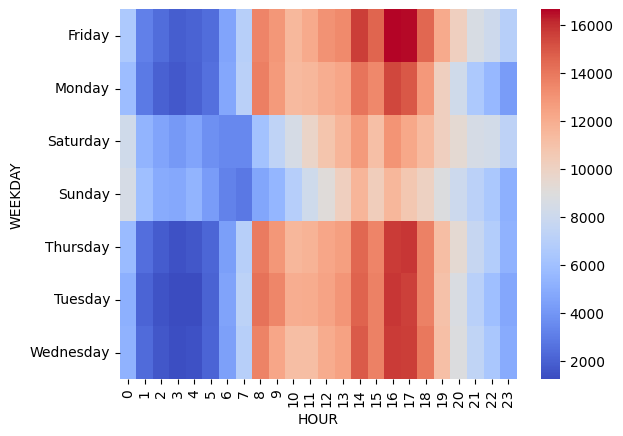

In [73]:
#df['Hour'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.hour
heatmap_data = df.groupby(['WEEKDAY', 'HOUR']).size().unstack()
sb.heatmap(heatmap_data, cmap='coolwarm', annot=False)


In [88]:
top_locations = df['LOCATION'].value_counts().head(101).tail(100).reset_index()
top_locations.columns = ['LOCATION', 'CRASH COUNT']
top_locations[['LATITUDE', 'LONGITUDE']] = top_locations['LOCATION'].str.extract(r'\((.*), (.*)\)').astype(float)
print(top_locations)

                     LOCATION  CRASH COUNT   LATITUDE  LONGITUDE
0   (40.6960346, -73.9845292)          587  40.696035 -73.984529
1      (40.696033, -73.98453)          523  40.696033 -73.984530
2      (40.861862, -73.91282)          478  40.861862 -73.912820
3   (40.7606005, -73.9643142)          474  40.760601 -73.964314
4   (40.7572323, -73.9897922)          456  40.757232 -73.989792
..                        ...          ...        ...        ...
95     (40.746033, -73.93441)          237  40.746033 -73.934410
96  (40.7429104, -73.9928041)          236  40.742910 -73.992804
97   (40.7373607, -73.996839)          236  40.737361 -73.996839
98  (40.8077723, -73.9454833)          235  40.807772 -73.945483
99     (40.696198, -73.98869)          234  40.696198 -73.988690

[100 rows x 4 columns]


In [89]:
import folium

In [106]:
map_center = [40.7128, -74.0060]  # NYC center coordinates
crash_map = folium.Map(location=map_center, zoom_start=12)

# Step 5: Add markers for the top 10 locations
for _, row in top_locations.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"Location: {row['LOCATION']}<br>Crash Count: {row['CRASH COUNT']}",
        tooltip=f"{row['CRASH COUNT']} crashes",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(crash_map)

# Step 6: Save the map
crash_map.save('top_10_crash_locations.html')
crash_map

In [123]:
locations = df['LOCATION'].value_counts().reset_index()
locations.columns = ['LOCATION', 'CRASH COUNT']
locations[['LATITUDE', 'LONGITUDE']] = top_locations['LOCATION'].str.extract(r'\((.*), (.*)\)').astype(float)
print(len(locations), '\n',locations.head(),'\n',locations.dropna(), '\n', locations)

275388 
                     LOCATION  CRASH COUNT   LATITUDE  LONGITUDE
0                 (0.0, 0.0)         3760  40.696035 -73.984529
1  (40.6960346, -73.9845292)          587  40.696033 -73.984530
2     (40.696033, -73.98453)          523  40.861862 -73.912820
3     (40.861862, -73.91282)          478  40.760601 -73.964314
4  (40.7606005, -73.9643142)          474  40.757232 -73.989792 
                      LOCATION  CRASH COUNT   LATITUDE  LONGITUDE
0                  (0.0, 0.0)         3760  40.696035 -73.984529
1   (40.6960346, -73.9845292)          587  40.696033 -73.984530
2      (40.696033, -73.98453)          523  40.861862 -73.912820
3      (40.861862, -73.91282)          478  40.760601 -73.964314
4   (40.7606005, -73.9643142)          474  40.757232 -73.989792
..                        ...          ...        ...        ...
95  (40.7629663, -73.9739693)          237  40.746033 -73.934410
96     (40.746033, -73.93441)          237  40.742910 -73.992804
97  (40.7429104, -73

In [115]:
from folium.plugins import HeatMap
heatmap_data = locations[['LATITUDE', 'LONGITUDE']].dropna().values.tolist()
HeatMap(heatmap_data).add_to(crash_map)
crash_map

KeyError: "None of [Index(['LATITUDE', 'LONGITUDE'], dtype='object')] are in the [columns]"

In [116]:
print(len(heatmap_data))

100


In [120]:
# Check rows where extraction fails
invalid_locations = df['LOCATION'][df['LOCATION'].str.match(r'\(.*,\s.*\)') == False]
print(invalid_locations)

Series([], Name: LOCATION, dtype: object)
